In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
import seaborn as sns



In [83]:
iris = datasets.load_iris()

df = pd.DataFrame(iris.data, columns=['sepal length', 'sepal width', 'petal length', 'petal width'])
df['target name'] = iris.target

# df['target name'].replace({0:'Setosa', 1:'Versicolor', 2:'Virginica'}, inplace=True)
df

,sepal length,sepal width,petal length,petal width,target name
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [84]:
numeric_columns = df.select_dtypes(include='number').columns
print(f'Numeric columns: {numeric_columns}')

categorical_columns = df.select_dtypes(include='category').columns
print(f'Categorical columns: {categorical_columns}')


### Categorical Column = 'target name'


Numeric columns: Index(['sepal length', 'sepal width', 'petal length', 'petal width',
       'target name'],
      dtype='object')
Categorical columns: Index([], dtype='object')


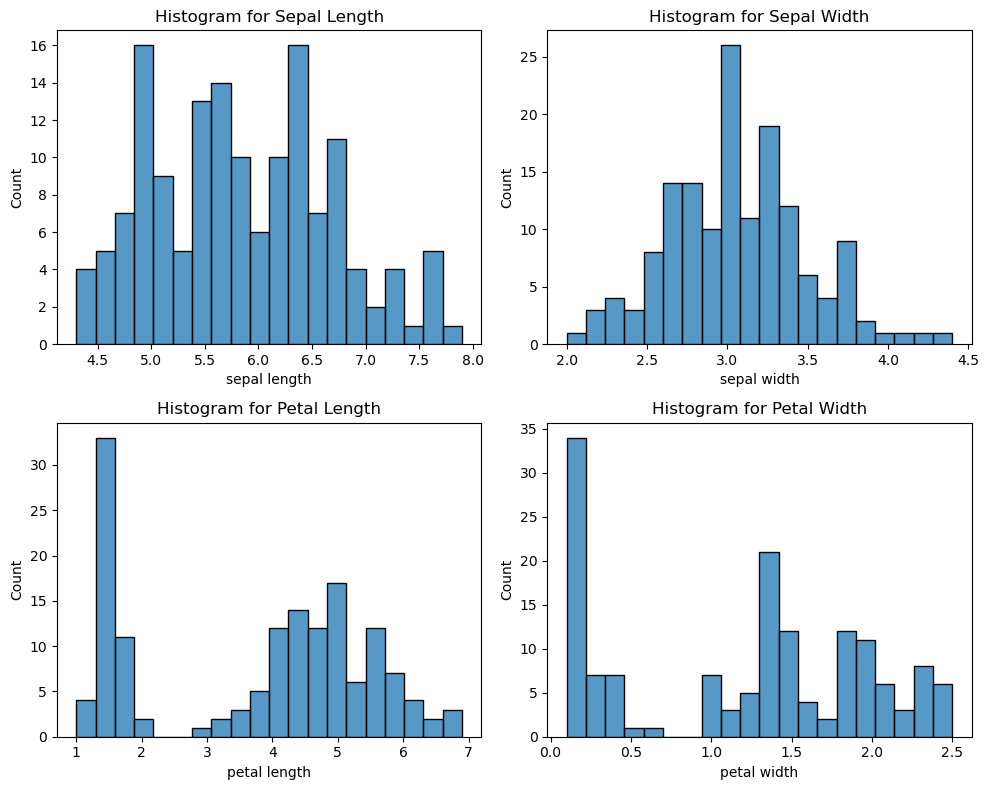

In [85]:
# Similarly we can draw the histograms for other features as well

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x='sepal length', bins=20, ax=axes[0, 0])
axes[0, 0].set_title('Histogram for Sepal Length')

sns.histplot(data=df, x='sepal width', bins=20, ax=axes[0, 1])
axes[0, 1].set_title('Histogram for Sepal Width')

sns.histplot(data=df, x='petal length', bins=20, ax=axes[1, 0])
axes[1, 0].set_title('Histogram for Petal Length')

sns.histplot(data=df, x='petal width', bins=20, ax=axes[1, 1])
axes[1, 1].set_title('Histogram for Petal Width')


plt.tight_layout()
plt.show()

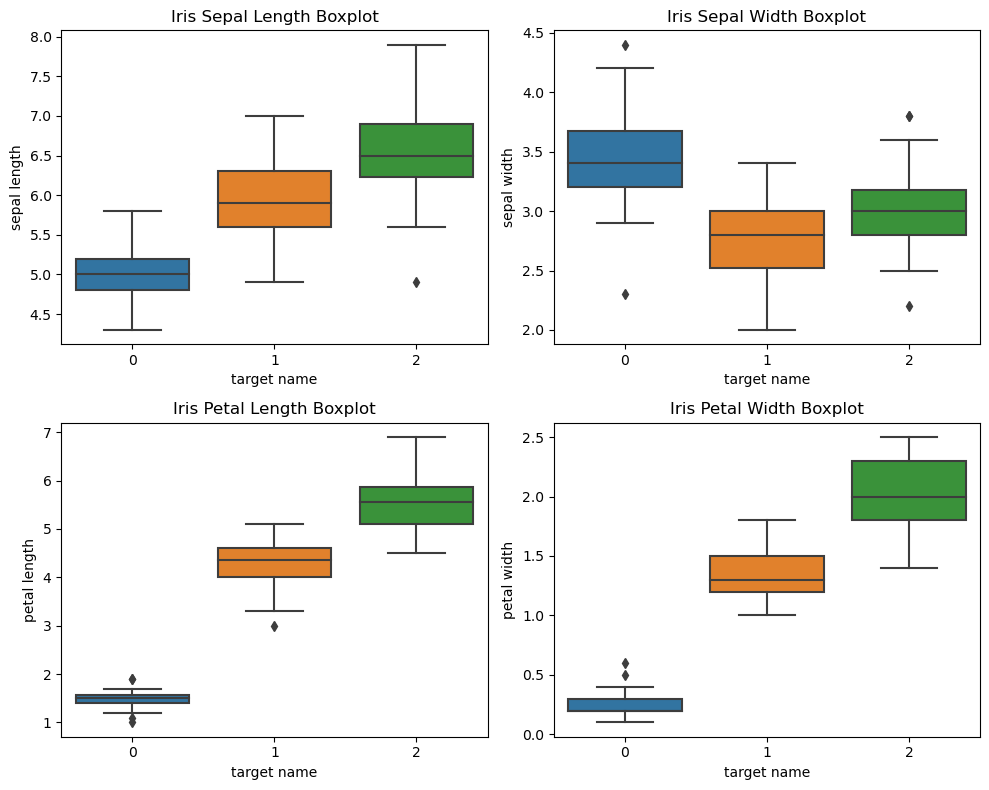

In [87]:
# Create a figure with 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

sns.boxplot(data=df, x='target name', y='sepal length', ax=axes[0, 0])
axes[0, 0].set_title('Iris Sepal Length Boxplot')

sns.boxplot(data=df, x='target name', y='sepal width', ax=axes[0, 1])
axes[0, 1].set_title('Iris Sepal Width Boxplot')

sns.boxplot(data=df, x='target name', y='petal length', ax=axes[1, 0])
axes[1, 0].set_title('Iris Petal Length Boxplot')

sns.boxplot(data=df, x='target name', y='petal width', ax=axes[1, 1])
axes[1, 1].set_title('Iris Petal Width Boxplot')

plt.tight_layout()

plt.show()

In [88]:
Q1 = np.percentile(df, 25)
Q3 = np.percentile(df, 75)
IQR = Q3-Q1

In [89]:
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

outliers_sl = df[(df['sepal length'] >= upper_bound) | (df['sepal length'] <= lower_bound)]
outliers_sw = df[(df['sepal width'] >= upper_bound) | (df['sepal width'] <= lower_bound)]
outliers_pl = df[(df['petal length'] >= upper_bound) | (df['petal length'] <= lower_bound)]
outliers_pw = df[(df['petal width'] >= upper_bound) | (df['petal width'] <= lower_bound)]

## No outliers for any of the features.
